In [ ]:
# importing required modules
!pip install transformers

import os
import pickle
import time
import warnings
import requests
import re
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from collections import Counter
import nltk
from nltk.sentiment import SentimentAnalyzer
from nltk.classify import NaiveBayesClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import transformers
import torch

nltk.download('punkt')
nltk.download('wordnet')

warnings.simplefilter(action='ignore', category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# !wget tokens.zip
!unzip tokens.zip

Archive:  tokens.zip
replace neg.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: neg.txt                 
  inflating: pos.txt                 
  inflating: stop.txt                


In [ ]:
# creating empty reviews list
product_reviews = []

for i in range(1, 21):
    oneplus = []
# defining url as product webpage
    url = "https://www.amazon.in/OnePlus-Silver-Storage-hands-free-capable/product-reviews/B09MQBRCSZ/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=" + \
        str(i)
    response = requests.get(url)
# using html parser reading html page
    soup = bs(response.content, "html.parser")
    # finding all the reviews and storing them in reviews variable
    reviews = soup.find_all(
        "span", attrs={"class", "a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        # appending each review into oneplus list
        oneplus.append(reviews[i].text)
     # adding all reviews to product_reviewa
    product_reviews = product_reviews + oneplus


In [ ]:
# storing all the reviews in a txt file
with open("oneplus.txt", "w", encoding='utf8') as output:
    output.write(str(product_reviews))

# joining the reviews
rev = " ".join(product_reviews)


In [ ]:
# imporing nltk module
import nltk

# converting all the reviews to lower case
rev = re.sub("[^A-Za-z" "]+", " ", rev).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

# all the words in the reviews
words = rev.split(" ")

words = words[1:]


In [ ]:
# importing required modules
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1, 1))
X = vectorizer.fit_transform(words)

with open("/content/stop.txt", "r") as w:
    stopwords = w.read()

stopwords = stopwords.split("\n")

stopwords.extend(["oneplus", "mobile", "time", "android",
                 "phone", "device", "product", "day"])

words = [w for w in words if not w in stopwords]

# Joining words
rev = " ".join(words)


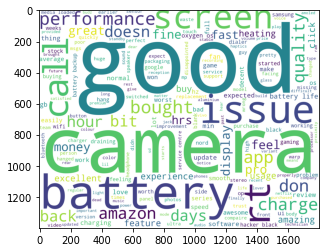

In [ ]:
# wordcloud
words_wordcloud = WordCloud(background_color='White',
                            width=1800,
                            height=1400
                            ).generate(rev)
plt.imshow(words_wordcloud)


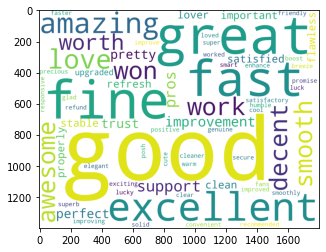

In [ ]:
# storing all the positive words in a variable called positive
with open("/content/pos.txt", "r") as pw:
    positive = pw.read().split("\n")

positive_positive = " ".join([w for w in words if w in positive])

positive_wordcloud = WordCloud(
    background_color='White',
    width=1800,
    height=1400
).generate(positive_positive)
plt.figure(2)
plt.imshow(positive_wordcloud)


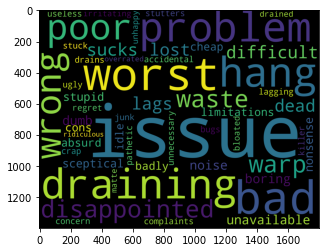

In [ ]:
# extracting negative worsd and storing them in negative variable
with open("/content/neg.txt", "r") as neg:
    negative = neg.read().split("\n")

# negative word cloud
negative_negative = " ".join([w for w in words if w in negative])

negative_wordcloud = WordCloud(
    background_color='black',
    width=1800,
    height=1400
).generate(negative_negative)
plt.figure(3)
plt.imshow(negative_wordcloud)


In [ ]:
# performing word_cloud on bigram
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')


lem = nltk.WordNetLemmatizer()

# converting to lower case
text = rev.lower()

# replacing "'" with """
text = text.replace("'", "")

tokens = nltk.word_tokenize(text)
txt = nltk.Text(tokens)

# elimating unnecessary symbols
content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word))
           for word in txt]

# set of stopwords are created
wc = set(STOPWORDS)
# removing words which doesn't contribute any meaning
removing_words = ['price', 'great']
new_sw = wc.union(removing_words)

# eliminating stop words
content = [word for word in content if word not in new_sw]

# non empty entries are taken into content
content = [s for s in content if len(s) != 0]

# performing lemmatization
content = [lem.lemmatize(t) for t in content]

list_bigrams = list(nltk.bigrams(content))
print(list_bigrams)

dic = [' '.join(tup) for tup in list_bigrams]
print(dic)

# to view occurance of bigrams CountVectorizer is used
vectorizer = CountVectorizer(ngram_range=(2, 2))
bagofwords = vectorizer.fit_transform(dic)
vectorizer.vocabulary_

sumofwords = bagofwords.sum(axis=0)
freqofwords = [(word, sumofwords[0, idx])
               for word, idx in vectorizer.vocabulary_.items()]
freqofwords = sorted(freqofwords, key=lambda x: x[1], reverse=True)
print(freqofwords[:100])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('dear', 'amazon'), ('amazon', 'team'), ('team', 'good'), ('good', 'working'), ('working', 'expected'), ('expected', 'battery'), ('battery', 'performance'), ('performance', 'battery'), ('battery', 'hour'), ('hour', 'internet'), ('internet', 'service'), ('service', 'rest'), ('rest', 'service'), ('service', 'location'), ('location', 'blue'), ('blue', 'tooth'), ('tooth', 'nfc'), ('nfc', 'switched'), ('switched', 'poor'), ('poor', 'previous'), ('previous', 'enhance'), ('enhance', 'batter'), ('batter', 'life'), ('life', 'charging'), ('charging', 'quick'), ('quick', 'work'), ('work', 'expected'), ('expected', 'fan'), ('fan', 've'), ('ve', 'purchased'), ('purchased', 'op'), ('op', 'op'), ('op', 'gift'), ('gift', 'amazon'), ('amazon', 'purchasing'), ('purchasing', 'thought'), ('thought', 'wrong'), ('wrong', 'amazon'), ('amazon', 'ensure'), ('ensure', 'support'), ('support', 'provided

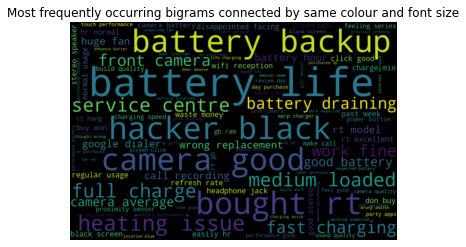

In [ ]:
# Generating wordcloud
words_dict = dict(freqofwords)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words=WC_max_words,
                      height=WC_height, width=WC_width, stopwords=new_sw)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
import pandas as pd
l=list()
for i in product_reviews:
  pos_count=0
  neg_count=0
  j = i.split(" ")
  words=[w for w in j if w in negative]
  neg_count= len(words)
  words=[w for w in j if w in positive]
  pos_count=len(words)
  if pos_count>neg_count:
    l.append([(i.strip('\n')).strip(' '),'Positive'])
  else:
    l.append([(i.strip('\n')).strip(' '),'Negative'])


import csv
columns = ['Phrase', 'Sentiment']
with open('/content/sentiment.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    writer.writerow(columns)
    for i in l:
      writer.writerow(i)
df = pd.read_csv('/content/sentiment.csv',usecols =columns)
df.dropna(how = 'any',axis=1,inplace=True)
df.to_csv('/content/sentiment.csv',index=False)
df.isnull().sum()

    
  

Phrase       0
Sentiment    0
dtype: int64

In [ ]:
positive_reviews = df[df['Sentiment'] == 'Positive']
postive_reviews_count = positive_reviews.shape[0]


In [ ]:
negative_reviews = df[df['Sentiment'] == 'Negative']
negative_reviews_count = negative_reviews.shape[0]


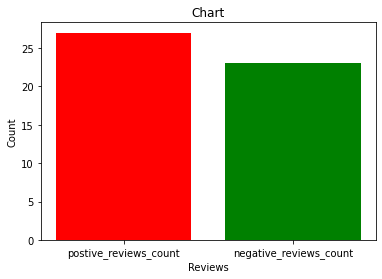

In [ ]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
l = [1, 2]

# heights of bars
height = [postive_reviews_count, negative_reviews_count]

# labels for bars
labels = ['postive_reviews_count', 'negative_reviews_count']

# plotting a bar chart
plt.bar(l, height, tick_label=labels,
        width=0.8, color=['red', 'green'])

# naming the x-axis
plt.xlabel('Reviews')
# naming the y-axis
plt.ylabel('Count')
# plot title
plt.title('Chart')

# function to show the plot
plt.show()


In [ ]:
sentiment_mapper = {
    'Negative': 0,
    'Positive': 1
}
df.Sentiment = df.Sentiment.map(sentiment_mapper)

In [ ]:
train, test = train_test_split(df, random_state=0)
X_train = train.Phrase
X_test = test.Phrase
y_train = train.Sentiment
y_test = test.Sentiment


In [ ]:
def get_accuracy():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return round(accuracy_score(y_pred, y_test), 3)


## Random Forest for Sentiment Analysis


encoding each sentence through basic methods such as bag of words and tf-idf.
using classic trees ensembles that use bagging and boosting, respectively.
ignoring the sentence Id.
ignoring in some cases the less frequent words.

In [ ]:
count_vectorizer = CountVectorizer(max_features=1000)
random_forest = RandomForestClassifier(max_depth=10, n_estimators=10)


In [ ]:
pipe = make_pipeline(count_vectorizer, random_forest)


In [ ]:
get_accuracy()


0.692

Let's look at the percentages of the classes in the true labels and in the predictions.

In [ ]:
y_pred = pipe.predict(X_test)


In [ ]:
round(pd.Series(y_train).value_counts(normalize=True), 2)


1    0.54
0    0.46
Name: Sentiment, dtype: float64

In [ ]:
round(pd.Series(y_pred).value_counts(normalize=True), 2)


0    0.62
1    0.38
dtype: float64

As we can see, Decision Trees in their basic configuration are not a good model for unbalanced data! In almost every node, the biggest category has the majority and that's what the model predicts for almost every row. The accuracy then is aproximately the percentage of the biggest category: 0.5.

Let's add now weights.

In [ ]:
random_forest.set_params(class_weight='balanced')
print(get_accuracy())
random_forest.set_params(class_weight='balanced_subsample')
print(get_accuracy())


0.385
0.462


Surprisingly or not, when using as weights the inverse of the classes proportion, the accuracy gets worst.

Through the confusion matrix we can see that the model is still predicting too much 2, although now the complexity increased.

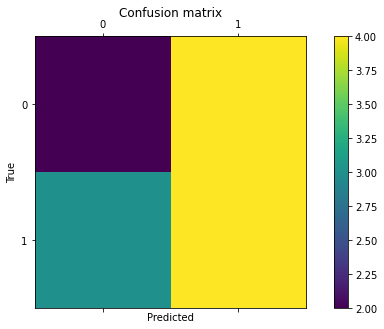

In [ ]:
labels = [i for i in range(2)]
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


We'll try also adding lemmatization and replacing the BOW with tf-idf.

In [ ]:
# taken from sklearn webpage
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer


class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]


In [ ]:
pipe[0].set_params(tokenizer=LemmaTokenizer())
get_accuracy()


0.308

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
pipe.steps[0] = ('vectorizer', tfidf_vectorizer)
get_accuracy()


0.462

That is, still poor results. We'll try with boosting using Adaboost and chi2

In [ ]:
ada_boost = AdaBoostClassifier()
pipe.steps[1] = ('adaboost', ada_boost)
get_accuracy()


0.385

We now see an improvement. We'll try now using only the most relevant words according to chi2.

In [ ]:
count_vectorizer.get_feature_names


<bound method CountVectorizer.get_feature_names of CountVectorizer(max_features=1000,
                tokenizer=<__main__.LemmaTokenizer object at 0x7f9e5d1a54d0>)>

In [ ]:
count_vectorizer = CountVectorizer()

bow = count_vectorizer.fit_transform(X_train)

words = count_vectorizer.get_feature_names()

p_value_limit = 0.95

dtf_features = pd.DataFrame()

for cat in range(5):
    _, p = chi2(bow, y_train == cat)
    dtf_features = dtf_features.append(pd.DataFrame(
        {"feature": words, "score": 1-p, "y": cat}))
    dtf_features = dtf_features.sort_values(["y", "score"],
                                            ascending=[True, False])
    dtf_features = dtf_features[dtf_features["score"] > p_value_limit]

X_names = dtf_features["feature"].unique().tolist()

pipe['vectorizer'].set_params(vocabulary=X_names)

get_accuracy()


0.538

# Neural networks for Sentiment Analysis

We'll use a simple NN with only one hidden layer.

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                     mode='max', verbose=1, save_best_only=True)


In [ ]:
def plot_metrics(model, plot_for):
    plt.plot(model.history.history[plot_for])
    plt.plot(model.history.history['val_'+plot_for])
    plt.legend(['train', 'test'], loc='upper right')
    plt.title(f'Epochs vs {plot_for}')
    plt.show()

  
def fit_sequential(X_train, X_test, sequential=None, epochs=20, patience=5):
    if sequential is None:
        input_size = X_train.shape[1]

        sequential = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(input_size, )),
            tf.keras.layers.Dense(128, activation='sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(2)
        ])
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=True)
        sequential.compile(optimizer='adam', loss=loss_fn,
                           metrics=['accuracy'])
        global mc
        mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                             mode='max', verbose=1, save_best_only=True)

    es = EarlyStopping(monitor='val_accuracy', mode='max',
                       verbose=1, patience=patience)
    sequential.fit(X_train, np.array(y_train), epochs=epochs, verbose=1,
                   validation_data=(X_test, np.array(y_test)), callbacks=[es, mc])
    plot_metrics(sequential, 'loss')
    plot_metrics(sequential, 'accuracy')
    sequential.load_weights('best_model.h5')
    return sequential

Using tf–idf as vectorizer for neural network

In [ ]:
vectorizer = TfidfVectorizer()


In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()


Epoch 1/20
1/2 [==============>...............] - ETA: 0s - loss: 0.9339 - accuracy: 0.4688
Epoch 1: val_accuracy improved from -inf to 0.53846, saving model to best_model.h5
2/2 [==============================] - 1s 245ms/step - loss: 0.8495 - accuracy: 0.5405 - val_loss: 0.8165 - val_accuracy: 0.5385
Epoch 2/20
1/2 [==============>...............] - ETA: 0s - loss: 0.6958 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 27ms/step - loss: 0.6948 - accuracy: 0.5135 - val_loss: 0.7980 - val_accuracy: 0.5385
Epoch 3/20
1/2 [==============>...............] - ETA: 0s - loss: 0.7090 - accuracy: 0.5938
Epoch 3: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 26ms/step - loss: 0.7108 - accuracy: 0.5946 - val_loss: 0.7729 - val_accuracy: 0.5385
Epoch 4/20
1/2 [==============>...............] - ETA: 0s - loss: 0.7579 - accuracy: 0.5938
Epoch 4: val_accuracy did not improve from 0.53846
2/2 [======

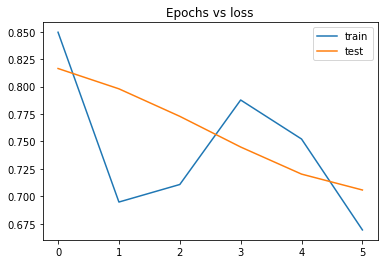

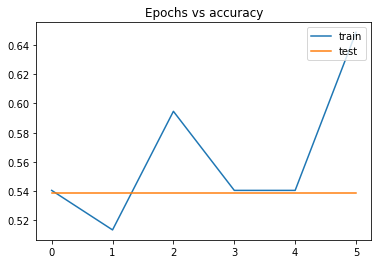

In [ ]:
sequential = fit_sequential(X_train_vectorized, X_test_vectorized)


Using Word2vec as vectorizer for neural network

In [ ]:
class W2VTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, size):
        self.size = size
        pass

    def fit(self, X, y=None):
        self.model = Word2Vec(min_count=1,
                              window=2,
                              size=self.size,
                              sample=6e-5,
                              alpha=0.03,
                              min_alpha=0.0007,
                              negative=20)
        sentences = [row.split() for row in X]

        self.model.build_vocab(sentences)
        self.model.train(
            sentences, total_examples=self.model.corpus_count, epochs=self.model.epochs)
        return self

    def get_vector(self, sentence):
        relevant_words_vectors = [self.model.wv[x]
                                  for x in sentence.split() if x in self.model.wv.vocab]
        if not relevant_words_vectors:
            return np.zeros(self.model.vector_size)  # .astype('float32')
        return np.mean(relevant_words_vectors, axis=0)

    def transform(self, X):
        arr = np.array([])
        for elem in X:
            arr = np.concatenate([arr, self.get_vector(elem)])
        return arr.reshape(-1, self.size)


In [ ]:
vectorizer = W2VTransformer(4)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


Epoch 1/20
1/2 [==============>...............] - ETA: 0s - loss: 1.1794 - accuracy: 0.3750
Epoch 1: val_accuracy improved from -inf to 0.46154, saving model to best_model.h5
2/2 [==============================] - 1s 189ms/step - loss: 1.0561 - accuracy: 0.4595 - val_loss: 0.9889 - val_accuracy: 0.4615
Epoch 2/20
1/2 [==============>...............] - ETA: 0s - loss: 1.0203 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.46154
2/2 [==============================] - 0s 29ms/step - loss: 1.0822 - accuracy: 0.4595 - val_loss: 0.9343 - val_accuracy: 0.4615
Epoch 3/20
1/2 [==============>...............] - ETA: 0s - loss: 0.9575 - accuracy: 0.4688
Epoch 3: val_accuracy did not improve from 0.46154
2/2 [==============================] - 0s 31ms/step - loss: 0.9567 - accuracy: 0.4595 - val_loss: 0.8729 - val_accuracy: 0.4615
Epoch 4/20
1/2 [==============>...............] - ETA: 0s - loss: 0.9913 - accuracy: 0.4688
Epoch 4: val_accuracy did not improve from 0.46154
2/2 [======

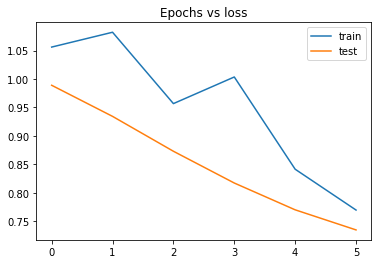

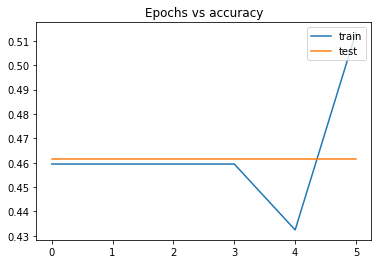

In [ ]:
sequential = fit_sequential(X_train_vectorized, X_test_vectorized)


In [ ]:
pca = PCA(n_components=2)
X_train_vectorized_2d = pca.fit_transform(X_train_vectorized)


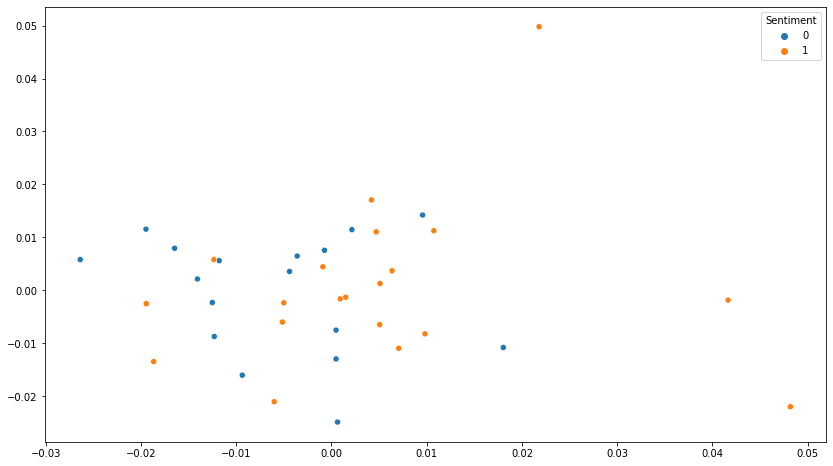

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.scatterplot(
    X_train_vectorized_2d[:, 0], X_train_vectorized_2d[:, 1], hue=y_train)


Even though the scatterplot is not showing us the "neutral" points we can see that indeed there is not much of a separation between the classes

with the same preprocessing as before but using a neural network, the results are slightly better. It looks like we need to change the preprocessing in such a way that we start using the order between the words. A very first simple method, before we try more complex stuff like Word2Vec or LDA, would be adding 2-grams.

## BERT for Sentiment Analysis

In [ ]:
model_class, tokenizer_class, pretrained_weights = (
    transformers.DistilBertModel, transformers.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
all_sentences = X_train.append([X_test, df.Phrase])

tokenized = all_sentences.apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True))

max_len = max(tokenized.apply(len))
padded = np.array([row + [0]*(max_len-len(row)) for row in tokenized])

attention_mask = np.where(padded != 0, 1, 0)

input_ids = torch.tensor(padded)
input_ids = torch.tensor(input_ids).to(torch.int64)

attention_mask = torch.tensor(attention_mask)

vector_length = model(input_ids[:1], attention_mask=attention_mask[:1])[
    0].shape[2]

vectors = np.zeros(shape=(0, vector_length))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


We're using an already trained version of distilBERT. In order to create the embedding, this has to be done in batches. For example through the below function:

In [ ]:
def get_bert_vectors():
    start = time.time()
    k = 1000
    for i in range(0, len(all_sentences), k):
        with torch.no_grad():
            last_hidden_states = model(
                input_ids[i:i+k], attention_mask=input_ids[i:i+k])
        vectors = np.concatenate([vectors, last_hidden_states[0].numpy(
        )[:, 0, :]]) if i > 0 else last_hidden_states[0].numpy()[:, 0, :]
    return vectors

vectors = get_bert_vectors()

In [ ]:
X_train_vectorized = vectors[:len(X_train)]
X_test_vectorized = vectors[len(X_train):len(X_train)+len(X_test)]
kaggle_test_vectorized = vectors[len(X_train)+len(X_test):]


Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.7172 - accuracy: 0.5625
Epoch 1: val_accuracy improved from -inf to 0.53846, saving model to best_model.h5
2/2 [==============================] - 1s 197ms/step - loss: 0.6989 - accuracy: 0.5946 - val_loss: 0.6791 - val_accuracy: 0.5385
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 0.7057 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 29ms/step - loss: 0.6969 - accuracy: 0.5135 - val_loss: 0.7004 - val_accuracy: 0.5385
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.7526 - accuracy: 0.5625
Epoch 3: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 28ms/step - loss: 0.7569 - accuracy: 0.5676 - val_loss: 0.6479 - val_accuracy: 0.5385
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 0.6909 - accuracy: 0.4688
Epoch 4: val_accuracy improved from 0.53846 to 0.61538, saving

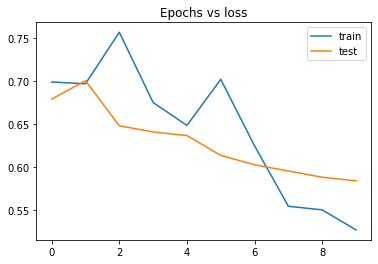

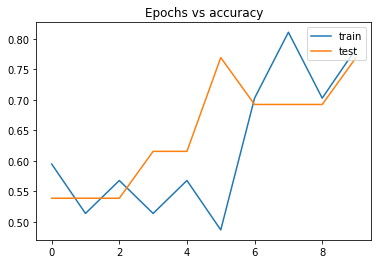

In [ ]:
sequential = fit_sequential(X_train_vectorized, X_test_vectorized, epochs=10)


## Inferene Code

based on the above evaluation metrics we found that neural networks with wordvec vectorizer performs the best

Epoch 1/20
1/2 [==============>...............] - ETA: 0s - loss: 0.7621 - accuracy: 0.4688
Epoch 1: val_accuracy improved from -inf to 0.53846, saving model to best_model.h5
2/2 [==============================] - 1s 181ms/step - loss: 0.8154 - accuracy: 0.4054 - val_loss: 0.6970 - val_accuracy: 0.5385
Epoch 2/20
1/2 [==============>...............] - ETA: 0s - loss: 0.6876 - accuracy: 0.5938
Epoch 2: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 33ms/step - loss: 0.6866 - accuracy: 0.5676 - val_loss: 0.6913 - val_accuracy: 0.5385
Epoch 3/20
1/2 [==============>...............] - ETA: 0s - loss: 0.6679 - accuracy: 0.6562
Epoch 3: val_accuracy did not improve from 0.53846
2/2 [==============================] - 0s 32ms/step - loss: 0.6894 - accuracy: 0.5946 - val_loss: 0.6906 - val_accuracy: 0.5385
Epoch 4/20
1/2 [==============>...............] - ETA: 0s - loss: 0.7784 - accuracy: 0.4688
Epoch 4: val_accuracy did not improve from 0.53846
2/2 [======

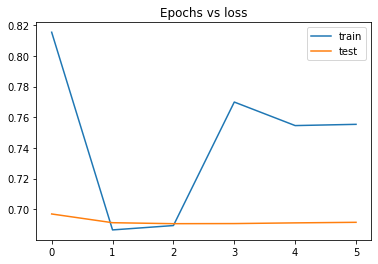

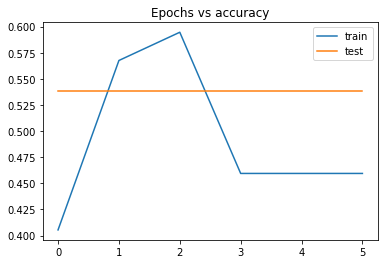

In [ ]:
vectorizer = W2VTransformer(4)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
sequential = fit_sequential(X_train_vectorized, X_test_vectorized)
mapper = {
    0: 'Negative',
    1: 'Positive'
}

def get_sentiment(model, vectorizer, mapper, text):
    return mapper.get(np.argmax(max(model.predict(vectorizer.transform(pd.Series([text]))))))


In [ ]:
print(get_sentiment(sequential, vectorizer, mapper, "Its great"))


Positive
